# Comment Lateness Analyisis

In this notebook, we will determine how long after the 'question due date' each comment was posted

- We will use this to determine the motivation of each student
- We will use data from cycles 1, 2, and 3 to determine the motivation of the students and use the previous cycles as a motivation level for our cycle 4 analysis

## Data preperation
- We need to prepare the data for analysis
- This involves:
    - Loading the requried packages
    - Loading the required data
    - Joining the dataframes together so we can relate the different data sources to one another
    - Data cleaning


### Loading the required packages

In [1]:
import pandas as pd 
import numpy as np

### Loading the data files
- We will use pd.read_excel() to read in our data files
- We won't load Cycle 3 data because there is **no comments data for Cycle 3** and that is what we plan to focus on in this notebook
    - Cycle 3 involved answering questions picked from Cycles 1 and 2 and didn't require students to write comments

In [2]:
# Courses
c1courses = pd.read_excel("../data/Cycle 1/C1 Courses.xlsx")
c2courses = pd.read_excel("../data/Cycle 2/C2 Courses.xlsx")
c4courses = pd.read_excel("../data/Cycle 4/C4Courses.xlsx")

# 
c1comments = pd.read_excel("../data/Cycle 1/C1 Comments.xlsx")
c2comments = pd.read_excel("../data/Cycle 2/C2 Comments.xlsx")
c4comments = pd.read_excel("../data/Cycle 4/C4Comments.xlsx")
c4usercourses = pd.read_excel("../data/Cycle 4/C4UsersCourses.xlsx")

### Joining of Cycle 1 data into a single, useful dataframe
- Rename columns so we can merge the dataframes nicely
- Ensure the types are correct so can merge properly
- Merge the two dataframes

In [3]:
print("c1courses columns:", c1courses.columns.to_list())
print("c1comments columns:", c1comments.columns.to_list())

c1courses columns: ['CourseID', 'StartDate', 'Deadline_Cmmnt', 'Deadline_Qustn']
c1comments columns: ['Comment_ID', 'course_id', 'Timestamp', 'user', 'Question_ID', 'Comment']


- From the above cell we can see that we need to rename some columns so we can join them nicely
- We will rename and merge the two dataframes in the below cell

In [4]:
c1courses.rename(columns={"CourseID" : "course_id", "StartDate" : "cycle_start", "Deadline_Cmmnt" : "comment_due", "Deadline_Qustn" : "question_due"}, inplace=True) # Rename CourseID to course_id
c1comments.rename(columns={"Timestamp" : "comment_time", "CommentID" : "comment_id", "user" : "user_id", "Question_ID" : "question_id", "Comment" : "comment"}, inplace=True)

- There is an annoying header row located in the middle of the data that we need to remove
- We'll remove it now by making sure the "course_id" column is not equal to the text " course_id "

In [5]:
c1comments = c1comments[c1comments["course_id"] != " course_id "]

- We will convert the data types of both the dataframes so they join properly too

In [6]:
#c1comments["course_id"] = pd.to_numeric(c1comments["course_id"])
c1comments = c1comments.astype({"course_id" : "int64", "comment_time" : 'datetime64'})
c1courses = c1courses.convert_dtypes()

c1combined = c1courses.merge(c1comments, on="course_id") # Merge the dataframes
c1combined.head() # Show the first 5 rows


,course_id,cycle_start,comment_due,question_due,Comment_ID,comment_time,user_id,question_id,comment
0,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,7039922,2020-03-04 18:10:30,634147,4342370,Terrible question.
1,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,7045684,2020-03-09 16:08:43,636012,4349814,I think the questions and answers were concise...
2,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,7045695,2020-03-09 16:14:25,636010,4342370,This question concerns history rather than sci...
3,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,7045749,2020-03-09 16:57:54,558135,4349855,I found this question particularly specific an...
4,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,7045750,2020-03-09 16:58:39,636010,4349841,The question assesses your knowledge on a broa...


- Now we have a dataframe that has the due date for the comment that was made for each of the comments

## Performing Analysis
- Next, we can calculate how long it took a student to write a comment after the question_due date
    - We're doing this to find out how long it took for a student to complete a comment after all the questions were due
    - We can use this metric to help us determine how motivated a student was
- We'll also calcualte a column to indicate how early before the comment_due date a student provided a comment on a question

### Creation of new columns
- We create the columns:
    - `comment_delta` (number of days after question due date that the comment was posted)
    - `comment_beforedue` (number of days before the comment due date that the comment was posted)
    - `late` (will be True if the comment was submitted after the comment_due date, False otherwise)

In [7]:
c1combined["comment_delta"] = (c1combined["comment_time"] - c1combined["question_due"])
c1combined["comment_beforedue"] = (c1combined["comment_due"] - c1combined["comment_time"])
c1combined["late"] = c1combined["comment_time"] > c1combined["comment_due"]

## Doing the same grouping that we did for Cycle 1 - but for cycle 2
- I won't go over the details here just performing similar steps as we did for cycle 1

In [8]:
c2courses.rename(columns={"CourseID" : "course_id", "StartDate" : "cycle_start", "Deadline_Comment" : "comment_due", "Deadline_Question" : "question_due"}, inplace=True) # Rename columns
c2courses.drop("CourseName", axis=1, inplace=True) # Remove the 'CourseName' column - we don't need it
c2comments.rename(columns={"Timestamp" : "comment_time", "CommentID" : "comment_id", "user" : "user_id", "Question_ID" : "question_id", "Comment" : "comment"}, inplace=True)

course_id                Int64
cycle_start     datetime64[ns]
comment_due     datetime64[ns]
question_due    datetime64[ns]
dtype: object

In [9]:
# Set data types
c2comments = c2comments.astype({"course_id" : "int64", "comment_time" : 'datetime64', "user_id" : "int64"}) 
c2courses = c2courses.convert_dtypes() 

# Merge the dataframes
c2combined = c2courses.merge(c2comments, on="course_id") 
c2combined.head()

,course_id,cycle_start,comment_due,question_due,Comment_ID,comment_time,user_id,question_id,comment
0,21140,2020-03-23,2020-04-05 01:00:10,2020-03-30 01:00:10,7110756,2020-03-27 23:02:16,636006,4394370,I think this is a good question. If you want t...
1,21140,2020-03-23,2020-04-05 01:00:10,2020-03-30 01:00:10,7112982,2020-03-28 11:49:09,635990,4394722,I think the answer to this question might be p...
2,21140,2020-03-23,2020-04-05 01:00:10,2020-03-30 01:00:10,7112999,2020-03-28 11:54:41,635990,4391826,I thought this question was a good test of kno...
3,21140,2020-03-23,2020-04-05 01:00:10,2020-03-30 01:00:10,7113019,2020-03-28 12:02:39,635990,4395323,"I thought this question was really good, as it..."
4,21140,2020-03-23,2020-04-05 01:00:10,2020-03-30 01:00:10,7113038,2020-03-28 12:10:55,635990,4396604,"I think this question was quite good, although..."


In [10]:
c2combined["comment_delta"] = (c2combined["comment_time"] - c2combined["question_due"])
c2combined["comment_beforedue"] = (c2combined["comment_due"] - c2combined["comment_time"])
c2combined["late"] = c2combined["comment_time"] > c2combined["comment_due"]

### Combining the two cycles into one DataFrame
- Now we need to combine the two dataframes into one by using `.concat()`
- We'll add an ID to each individual dataframe so we know what cycle they belong to

In [11]:
c1combined["cycle"] = 1
c2combined["cycle"] = 2

all_combined = pd.concat([c1combined, c2combined])
all_combined = all_combined.astype({"course_id" : "int64", "user_id" : "int64", "question_id" : "int64"})
all_combined[all_combined['late']].sort_values(by='comment_beforedue', ascending=False)

,course_id,cycle_start,comment_due,question_due,Comment_ID,comment_time,user_id,question_id,comment,comment_delta,comment_beforedue,late,cycle
2043,21038,2020-03-11,2020-03-19 01:00:10,2020-03-12 01:00:10,7070065,2020-03-19 01:01:09,636844,4353868,The question is a little confusing because of ...,7 days 00:00:59,-1 days +23:59:01,True,1
539,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,7062964,2020-03-17 01:01:57,636027,4350515,Basic question that demonstrates recall of inf...,7 days 00:01:47,-1 days +23:58:13,True,1
2733,21039,2020-03-12,2020-03-20 01:00:10,2020-03-13 01:00:10,7074889,2020-03-20 01:01:59,637312,4356537,All this question requires is to know the func...,7 days 00:01:49,-1 days +23:58:11,True,1
952,21142,2020-03-25,2020-04-07 01:00:10,2020-04-01 01:00:10,7136367,2020-04-07 01:02:34,636830,4415550,I think this was a pretty straightforward ques...,6 days 00:02:24,-1 days +23:57:36,True,2
540,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,7062968,2020-03-17 01:02:45,636042,4350561,Great question. Especially for study. Makes yo...,7 days 00:02:35,-1 days +23:57:25,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,21038,2020-03-11,2020-03-19 01:00:10,2020-03-12 01:00:10,7083996,2020-03-21 18:51:24,636919,4353630,"This question is easy, students have to pay at...",9 days 17:51:14,-3 days +06:08:46,True,1
2062,21038,2020-03-11,2020-03-19 01:00:10,2020-03-12 01:00:10,7084039,2020-03-21 18:58:24,636919,4353750,This question requires us to recall the functi...,9 days 17:58:14,-3 days +06:01:46,True,1
2805,21039,2020-03-12,2020-03-20 01:00:10,2020-03-13 01:00:10,7092265,2020-03-23 00:58:12,637292,4355861,This is a clear simple question that tests rec...,9 days 23:58:02,-3 days +00:01:58,True,1
1026,21142,2020-03-25,2020-04-07 01:00:10,2020-04-01 01:00:10,7144697,2020-04-10 05:54:18,636252,4423617,Great application question requiring the under...,9 days 04:54:08,-4 days +19:05:52,True,2


## Investigating our data
- Lets first look at the comment time in general
- Followed by the number of unqiue students who commented past the due date

In [12]:
print("Earliest comment was made at:", all_combined["comment_time"].min().strftime("%d/%m/%Y"))
print("Latest comment was made at:", all_combined["comment_time"].max().strftime("%d/%m/%Y"))

Earliest comment was made at: 04/03/2020
Latest comment was made at: 10/04/2020


<AxesSubplot:title={'center':'Time after due date of question that a comment was posted in Cycle 1'}, xlabel='Days after question due date', ylabel='Number of comments'>

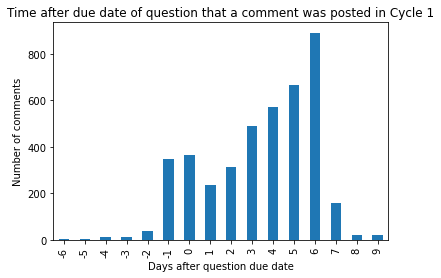

In [13]:
delta_grouped = all_combined["comment_time"].groupby(all_combined["comment_delta"].dt.days).count()

delta_grouped.plot(kind="bar", xlabel="Days after question due date", ylabel="Number of comments", title="Time after due date of question that a comment was posted in Cycle 1")

In [29]:
student_lateness = all_combined[["user_id", "late"]].groupby("user_id", as_index=False).sum("late")

- Plot the number of days a comment was late

<AxesSubplot:ylabel='Frequency'>

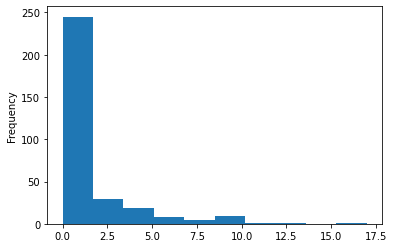

In [32]:
student_lateness["late"].plot(kind="hist") 

- Below is a dataframe of the students who were late (sorted by number of late comments)

In [34]:
student_lateness.sort_values("late", ascending=False)

,user_id,late
66,636027,17
56,636017,13
205,636844,11
316,640258,10
282,637293,10
...,...,...
139,636418,0
140,636419,0
141,636420,0
142,636421,0


### Connecting the students to their cycle 4 groups
- We need to link the students and their number of late comments do their groups in cycle 4
- This is so we can evaluate the impact of student 'lateness'/motivation on their marks and results

In [37]:
c4usercourses.rename(columns={"user" : "user_id", "Team" : "team"}, inplace=True) # Rename columns
c4usercourses_lateness = c4usercourses.merge(student_lateness.reset_index(drop=True), on="user_id") # merge the columns


### Showing the number of late students
- Below is a dataframe of late students
- Below that is a graph showing the lateness of students by team

In [46]:
c4usercourses_lateness.sort_values(by="late", ascending=False) # Sort the columns for output by lateness

,user_id,course_id,team,late
8,636027,21320,Black,17
43,636017,21320,Pink,13
188,636844,21327,Black,11
178,636919,21327,Yellow,10
253,637293,21328,Blue,10
...,...,...,...,...
29,561439,21320,Green,0
3,636010,21320,Black,0
2,636008,21320,Black,0
254,637281,21328,Brown,0


<AxesSubplot:xlabel='team'>

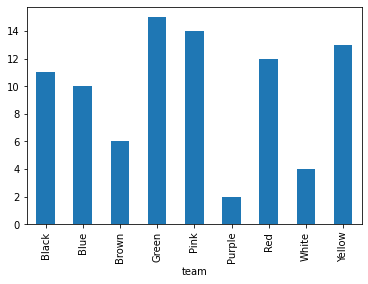

In [47]:
student_late_boolean = all_combined[["user_id", "late"]].groupby("user_id", as_index=False).any("late")
team_latenes_boolean = c4usercourses.merge(student_late_boolean, on="user_id")
team_latenes_boolean.groupby("team")["late"].sum().plot.bar(x='team',y='no. students',title='number of students in each team that submitted a late comment in cycles 1 and 2')

### Proportion of team who were late
- Below is a graph showing the Proportion of the team members who were late
- This is calcualted by (number of late team members) / (number of total team members)
- Yellow has the highest % of lately submitted comments

<AxesSubplot:title={'center':'proportion of members in the team who made a late comment in cycles 1 and 2'}, xlabel='team', ylabel='proportion'>

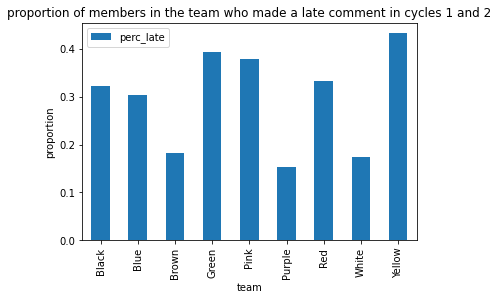

In [48]:
c4usercourses[c4usercourses['team'] == 'Pink']
team_latenes_boolean[team_latenes_boolean['team'] == 'Pink']

# Find number of members late and size of each team
members_late = team_latenes_boolean[["team", "late"]].groupby("team").sum()
team_size = team_latenes_boolean[["team", "user_id"]].groupby("team").nunique()

members_late["num_members"] = team_size
members_late["perc_late"] = members_late["late"] / members_late["num_members"] 
members_late = members_late.reset_index()
members_late[["team", "perc_late"]].plot.bar(x="team", title="proportion of members in the team who made a late comment in cycles 1 and 2", ylabel="proportion")